In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:

import os
import sys
import json

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import font_manager
%matplotlib inline

In [4]:
# resource configuration
rcParams['figure.dpi'] = 200

# fount information
rcParams['font.family'] = 'Equinor'
rcParams['font.size'] = 9

# fornt location
font_path = r'Equinor_regular'
font_files = font_manager.findSystemFonts(fontpaths=font_path)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [5]:
# where WellClass and Ga[ codes are located
sys.path.append('../')

In [6]:
# WellClass
# from well_class_v2 import csv_parser, Well
from src.WellClass.libs.utils import (
    csv_parser,
    yaml_parser
)

from src.WellClass.libs.well_class import Well
from src.WellClass.libs.well_pressure import Pressure

# plots
from src.WellClass.libs.plotting import (
    plot_pressure,
    plot_pt,
    plot_sketch,
)

## Some user options

In [7]:
# use yaml or csv input file
use_yaml = True

In [8]:
# pick an example from given three options

case_type = 'wildcat'

# case_type = 'smeaheia_v1'

# case_type = 'smeaheia_v2'

In [9]:
# where pvt located
pvt_path = '../test_data/pvt_constants/'

# Examples

The following are the test examples.

In [10]:
# examples
smeaheia_v1 = {'well_input': r'GaP_input_Smeaheia_v3.csv', 
               'well_input_yaml': r'smeaheia.yaml', 
            #    'sim_path': r'/scratch/SCS/eim/SMEAHEIA', 
               'sim_path': r'../test_data/examples/smeaheia_v1',
               'simcase': r'GEN_NOLGR_PH2'}
smeaheia_v2 = {'well_input': r'GaP_input_Smeaheia_v3.csv', 
               'well_input_yaml': r'smeaheia.yaml', 
            #    'sim_path': r'/scratch/SCS/bkh/wbook/realization-0/iter-0/pflotran/model', 
               'sim_path': r'../test_data/examples/smeaheia_v2', 
               'simcase': r'TEMP-0'}
wildcat = {
         'well_input': r'GaP_input_Wildcat_v3.csv', 
         'well_input_yaml': r'wildcat.yaml', 
        #  'sim_path': r'/scratch/SCS/bkh/well_class_test1/realization-0/iter-0/pflotran/model', 
         'sim_path': r'../test_data/examples/wildcat', 
         'simcase': r'TEMP-0'}

In [11]:
examples = {
    'smeaheia_v1': smeaheia_v1,
    'smeaheia_v2': smeaheia_v2,
    'wildcat': wildcat
}

# Load well CSV or yaml configuration file

Process CSV with well class.
Predefine a dictionary that includes the input CSV well file, the simulation path, and the PFT sim case name

In [12]:
# the selected example for testing
case = examples[case_type]


In [13]:

# root_path = '/scratch/SCS/gpb/SCREEN/GaP_code'

sim_path = case['sim_path']


In [14]:
if use_yaml:
    # where well configuration file is located
    well_name = os.path.join(sim_path, case['well_input_yaml'])
    
    # # pydantic model
    well_model = yaml_parser(well_name)
    well_csv = json.loads(well_model.spec.model_dump_json())
else:
    # where well configuration file is located
    well_name = os.path.join(sim_path, case['well_input'])

    # load the well information
    well_csv = csv_parser(well_name)

In [15]:
#Process well by running well class
my_well = Well( header       = well_csv['well_header'], 
                drilling     = well_csv['drilling'],
                casings      = well_csv['casing_cement'],
                geology      = well_csv['geology'],
                barriers     = well_csv['barriers'], 
                barrier_perm = well_csv['barrier_permeability'],
                co2_datum    = well_csv['co2_datum'],
           )

In [20]:
my_pressure = Pressure(
    header      = well_csv['well_header'],
    reservoir_P = well_csv['reservoir_pressure'],
    co2_datum   = well_csv['co2_datum'],
    pvt_path    = pvt_path,
)

Hydrostatic pressure at reference depth 2238 is 224.24
RP1 set as hydrostatic P = 224.24 bar
RP2 is set as delta pressure, which yields P = 224.24 +20.00 = 244.24 bar
RP3 ignored
Pressure scenario RP1: Compute pressures assuming reservoir pressure is 224.24 bar at 2238.00 mTVDMSL
Pressure scenario RP2: Compute pressures assuming reservoir pressure is 244.24 bar at 2238.00 mTVDMSL


In [21]:
my_pressure.pressure_CO2

init                                         RP1               \
     depth_msl    temp        hs_p       Shmin         h2o      h2o_rho   
0            0    4.00    1.013250    1.013250    1.017127  1025.768142   
1            1    4.00    1.113844    1.113844    1.117720  1025.773196   
2            2    4.00    1.214438    1.214438    1.218314  1025.778250   
3            3    4.00    1.315033    1.315033    1.318908  1025.783303   
4            4    4.00    1.415628    1.415628    1.419503  1025.788357   
...        ...     ...         ...         ...         ...          ...   
4465      4465  178.40  436.165105  750.598248  436.216675   936.616686   
4466      4466  178.44  436.256953  750.767748  436.308523   936.579086   
4467      4467  178.48  436.348797  750.937248  436.400368   936.541481   
4468      4468  178.52  436.440638  751.106748  436.492210   936.503870   
4469      4469  178.56  436.532475  751.276248  436.584047   936.466252   

                                                          RP2               \
            co2     co2_rho h2o_rho_in_co2_column         h2o      h2o_rho   
0     62.090896  925.479656           1028.815536   20.823300  1026.761023   
1     62.181658  925.557696           1028.820033   20.923991  1026.766059   
2     62.272428  925.635674           1028.824531   21.024682  1026.771096   
3     62.363206  925.713593           1028.829029   21.125374  1026.776132   
4     62.453991  925.791451           1028.833528   21.226065  1026.781168   
...         ...         ...                   ...         ...          ...   
4465        NaN         NaN                   NaN  456.407962   936.616686   
4466        NaN         NaN                   NaN  456.499811   936.579086   
4467        NaN         NaN                   NaN  456.591657   936.541481   
4468        NaN         NaN                   NaN  456.683499   936.503870   
4469        NaN         NaN                   NaN  456.775336   936.466252   

                                                   
            co2     co2_rho h2o_rho_in_co2_column  
0     76.326358  936.984112           1029.519826  
1     76.418251  937.054041           1029.524365  
2     76.510154  937.123928           1029.528904  
3     76.602069  937.193774           1029.533444  
4     76.693994  937.263578           1029.537984  
...         ...         ...                   ...  
4465        NaN         NaN                   NaN  
4466        NaN         NaN                   NaN  
4467        NaN         NaN                   NaN  
4468        NaN         NaN                   NaN  
4469        NaN         NaN                   NaN  

[4470 rows x 14 columns]

In [22]:
pd.DataFrame(my_pressure.pressure_scenarios).T


,name,p_resrv,type,p_MSAD,z_MSAD,z_resrv,p_delta
1,RP1,224.236695,reservoir,132.681369,819.472692,2238,0.0
2,RP2,244.236695,reservoir,161.898989,991.848034,2238,20.0


# Visualization

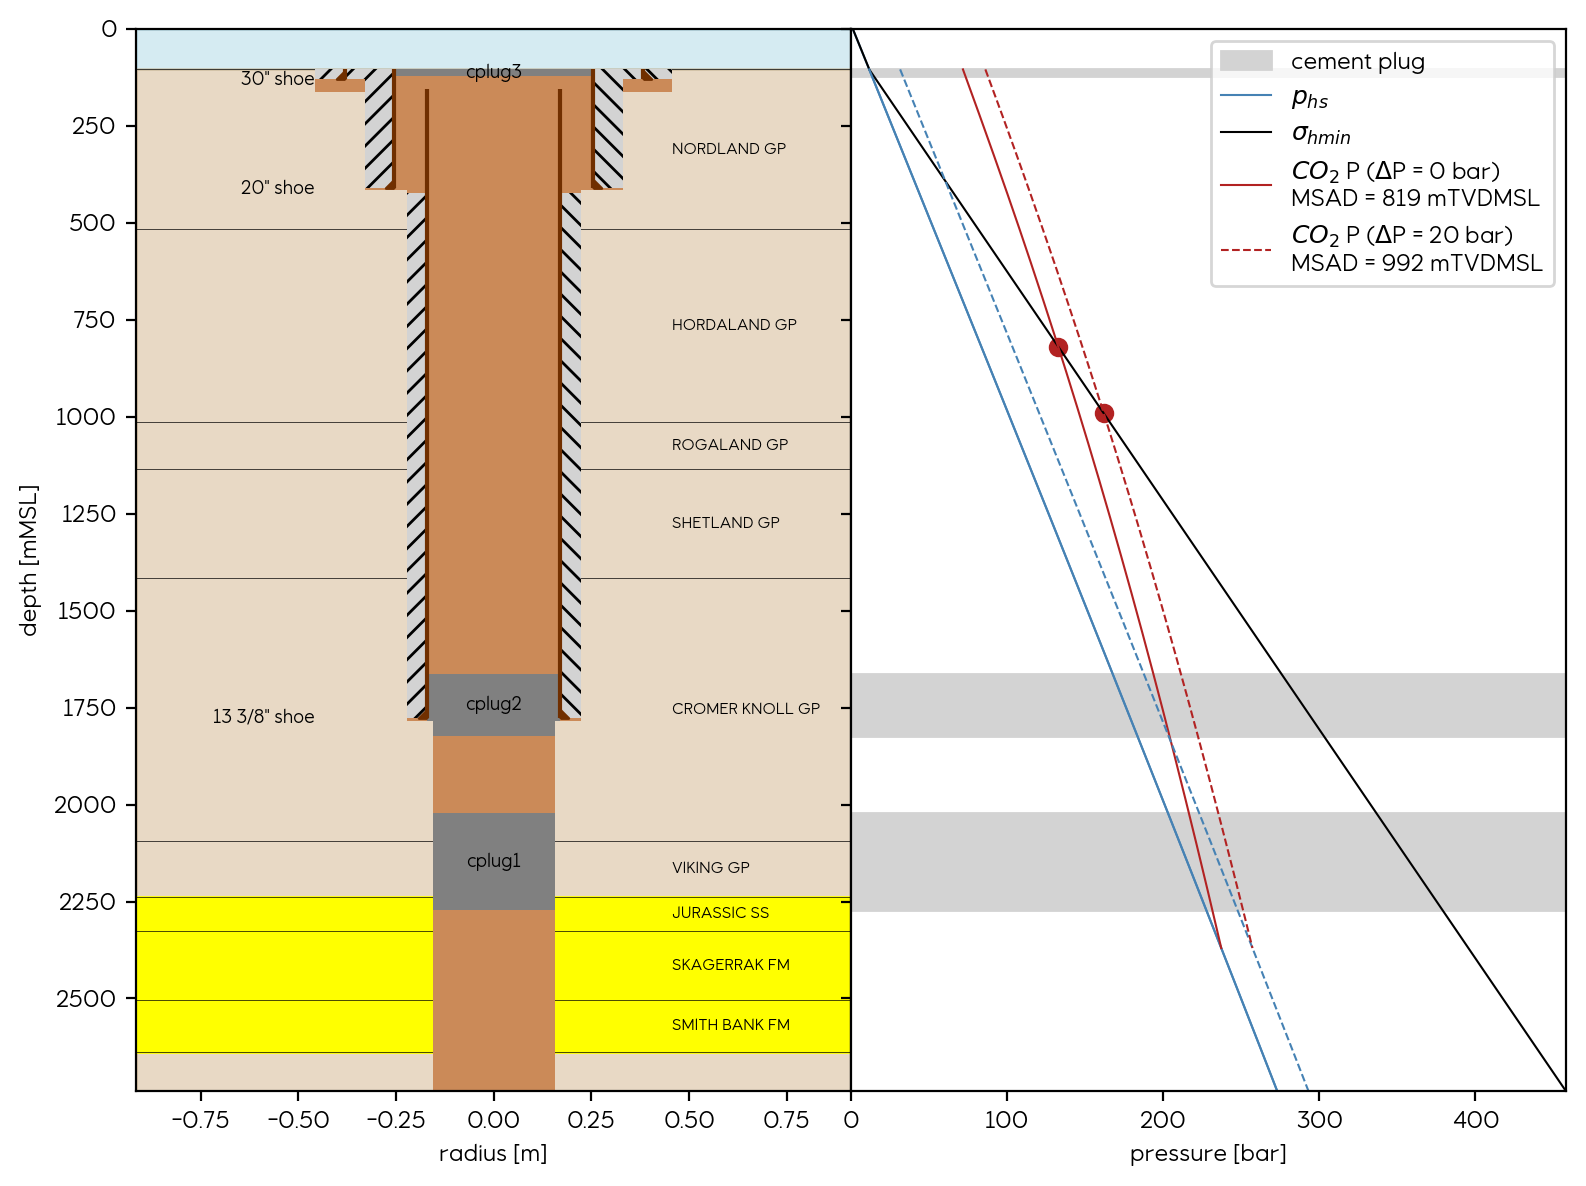

In [25]:
#Plot sketch, pressures
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(8, 6))
plot_sketch(my_well, draw_open_hole=False, ax=ax1)
plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax2, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_RP=True, #plot reservoir pressure scenarios
              plot_MSAD= True, #plot minimum safety abandonment depth
              plot_maxP=True #plot max expected pressures
              )

fig.tight_layout()
fig.subplots_adjust(wspace=0)


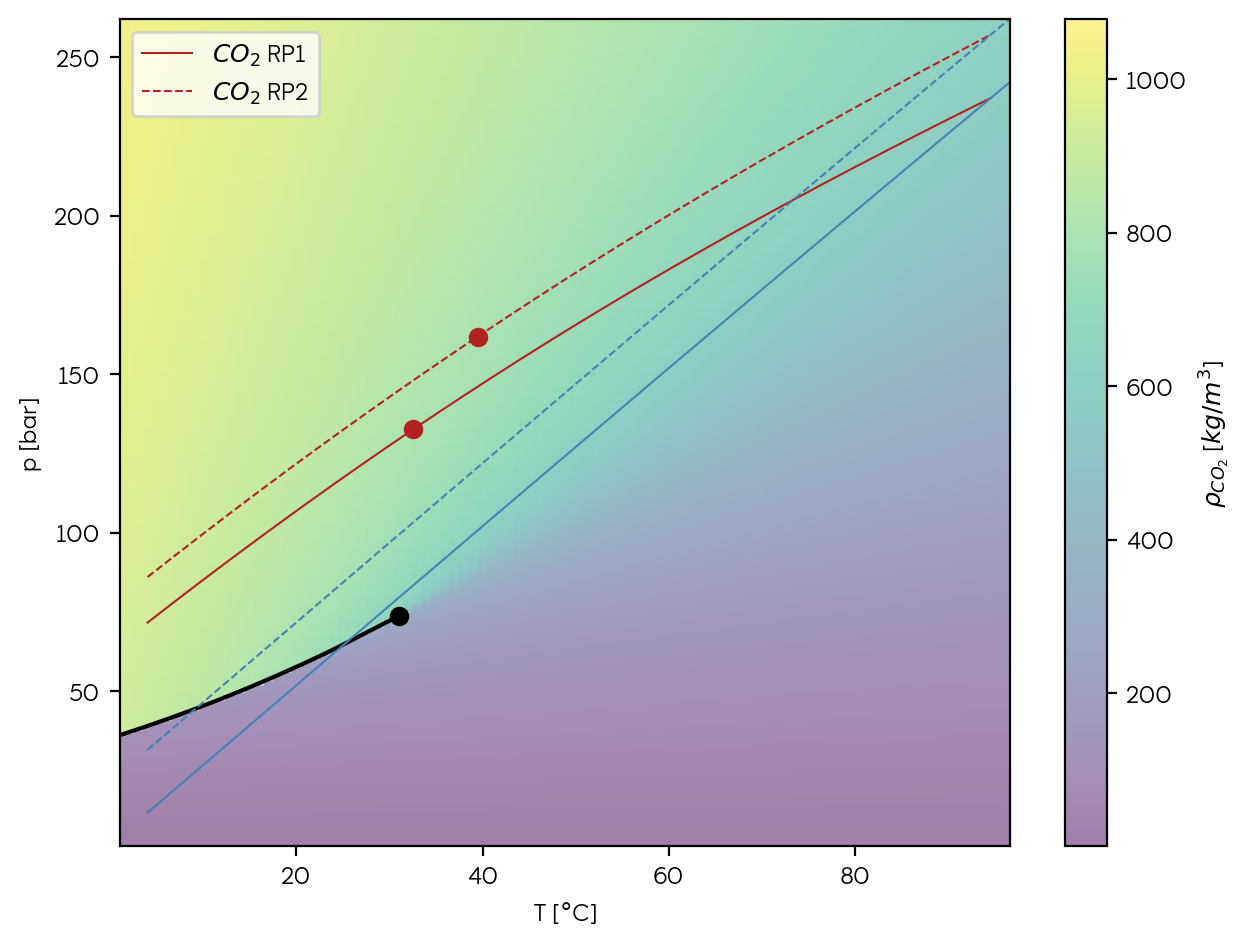

In [92]:
plot_pt(my_pressure, plot_RP=True, plot_maxP=False, plot_MSAD=True)

# CO2 Leakage

In [85]:
# pick one barrier
main_barrier = well_csv['main_barrier']
main_barrier

'cplug1'

In [86]:
# compute its leakage
barrier_leakage = my_pressure.compute_barrier_leakage(my_well, main_barrier)
barrier_leakage

barrier_perm:  [0.01, 10.0, 1000.0]


,0.01,10.00,1000.00
RP1,0,0.00995,1.00604
RP2,0,0.01492,1.50341
